# Ley de los grandes números

Ilustre la convergencia de la ley de los grandes números.

Utilice simulaciones de una variable binomial con $p = 0.5$ y $N = 10$.

Haga una gráfica para $n \in \{5, 10, \ldots 10,000\}$

In [1]:
from scipy.stats import binom
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def LGN_binom(N = 10, p = 0.5):
    #Fija semilla (para reproducir siempre lo mismo)
    np.random.seed(54321)
    
    #esperanza teórica
    mu_true = binom.mean(N, p)

    #eje x
    eje_x = np.arange(5, 1005, 5)

    #Para almacenar los estimados de mu
    #para cada n
    mu_estim = []

    for n in eje_x:
        #obtiene una muestra
        #de tamaño n
        muestra = binom.rvs(n = N, p = p, size = n)

        #obtiene el promedio
        mu_estim.append(muestra.mean())
        
    #Crea la gráfica
    plt.plot(eje_x, mu_estim, '-g')
    plt.hlines(y = mu_true, xmin = eje_x[0], 
              xmax = eje_x[-1], colors = 'blue')
    plt.title('Convergencia a $\mu$')
    plt.xlabel('Tamaño de la muestra')
    plt.ylabel('$\mu$')
    plt.xticks(eje_x[0::10], eje_x[0::10], rotation = 90)
    plt.show()

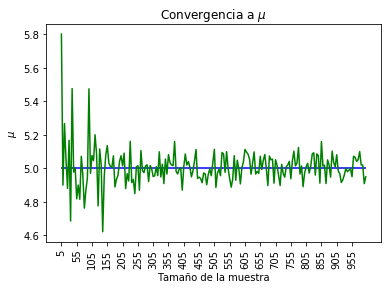

In [3]:
LGN_binom(10, 0.5)

# Teorema del límite central

Utilizando simulación ilustre el teorema del límite central.

Simule $n$ variables aleatorias con distribución binomial $N = 10, p = 0.5$.

Con estas $n$, usted debe simular $M$ muestras $Z_n$.

$n \in \{10, 20, \ldots, 200\}$

$M = 10,000$

Ilustre sus resultados comparando con la densidad normal estándar y un histograma.

In [4]:
def TLC_binom(N = 10, p = 0.5, M = 10_000):
    #Fija semilla (para reproducir siempre lo mismo)
    np.random.seed(54321)
    
    #tamaño de cada muestra
    tam_muestra= np.arange(10, 210, 10)
    
    #mu y sigma teóricos
    mu = binom.mean(n = N, p = p)
    sigma = binom.std(n = N, p = p)
    
    #Para la distribución normal
    eje_x = np.linspace(-4, 4, 200)
    eje_y = norm.pdf(eje_x)
    
    for n in tam_muestra:
        #obtiene una muestra
        #de tamaño M x n
        muestra = binom.rvs(n = N, p = p, size = (M, n))
        
        #obtiene M muestras de Z_n
        muestra_z = muestra.mean(axis = 1)
        muestra_z = (muestra_z - mu) / (sigma / np.sqrt(n))
        
        #Crea la gráfica
        plt.title('Para n =' + str(n))
        plt.plot(eje_x, eje_y, '-b', lw = 2.0)
        plt.hist(muestra_z, bins = len(eje_x),
                 density = True, color='g')
        plt.show()

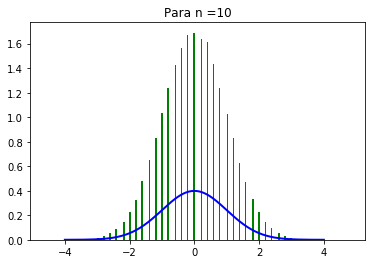

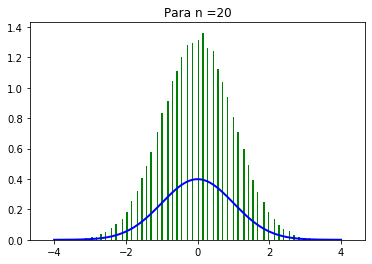

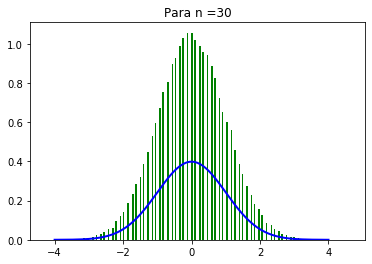

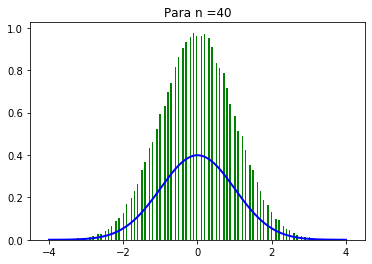

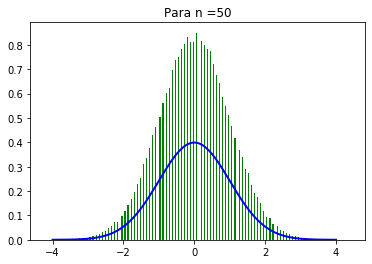

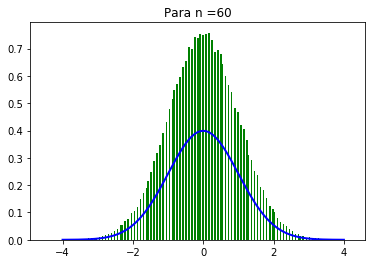

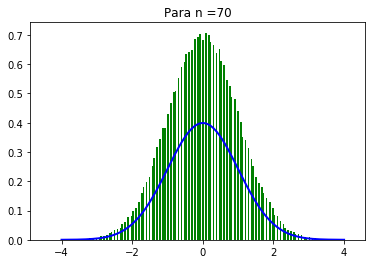

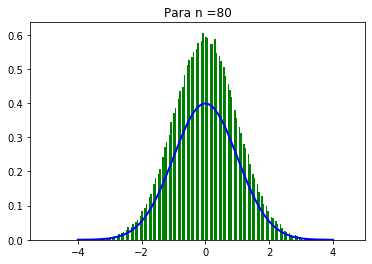

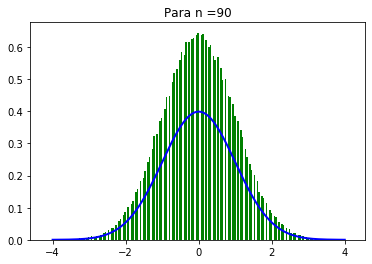

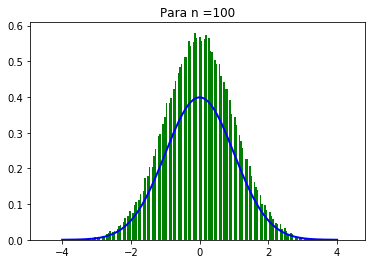

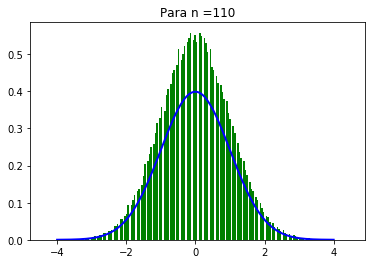

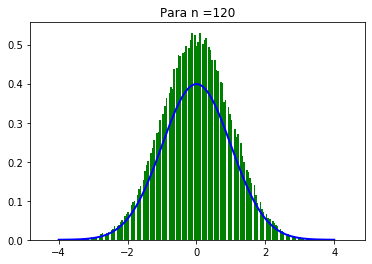

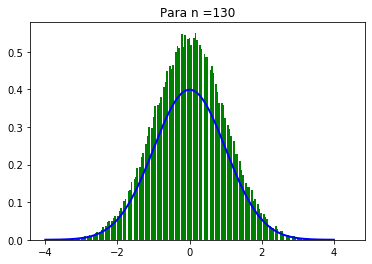

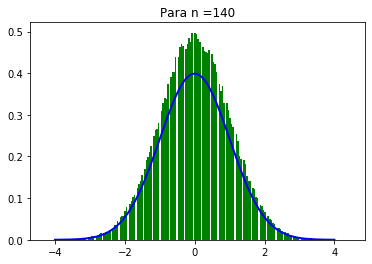

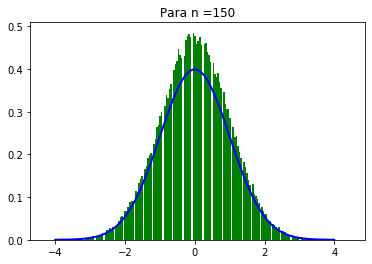

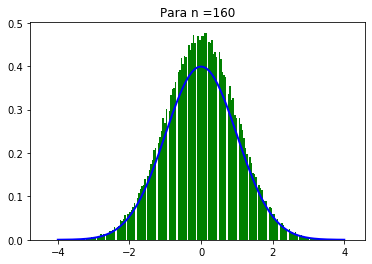

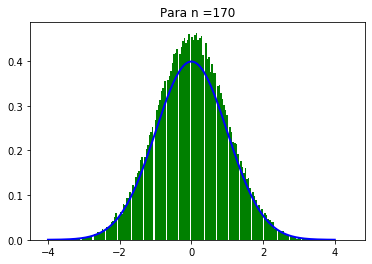

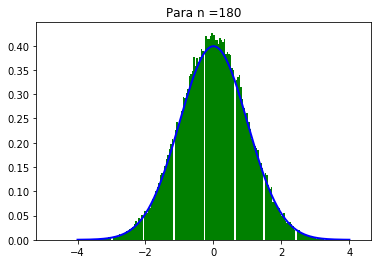

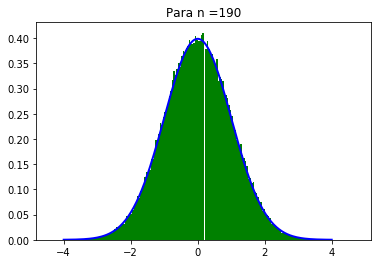

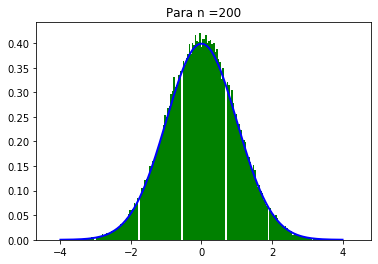

In [5]:
TLC_binom(M = 100_000)